# 선형회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 단순선형회귀 모델 만들기

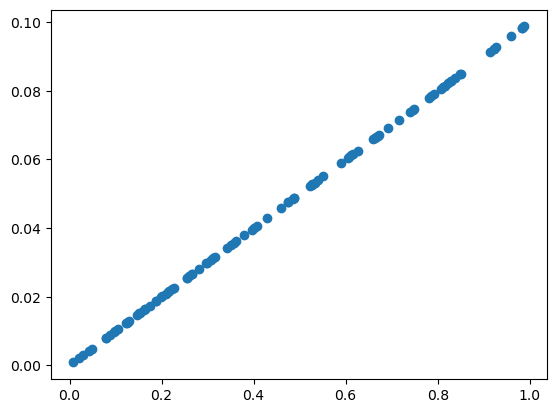

In [ ]:
X = np.random.rand(100)
y = 0.2 * X * 0.5  #ax+b

plt.scatter(X,y)


In [5]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [3]:
# 경사하강법 y=wX+b , w결정
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate = 0.5 #임의 값

Epoch 0, W : 0.0539, Error : 0.2034


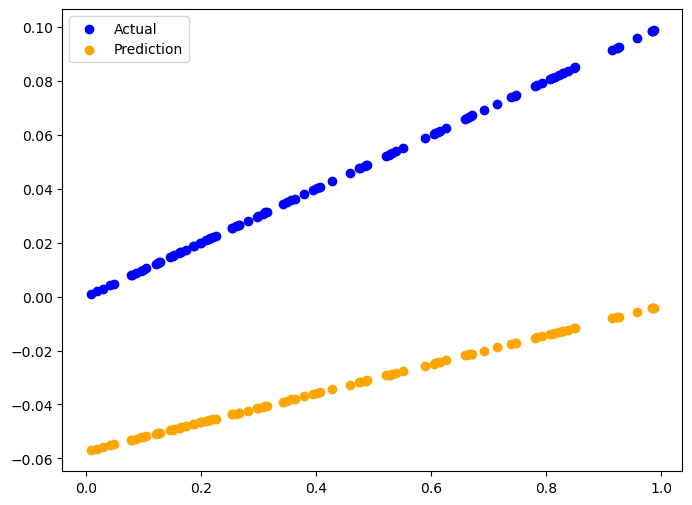

Epoch 10, W : 0.0898, Error : 0.0027


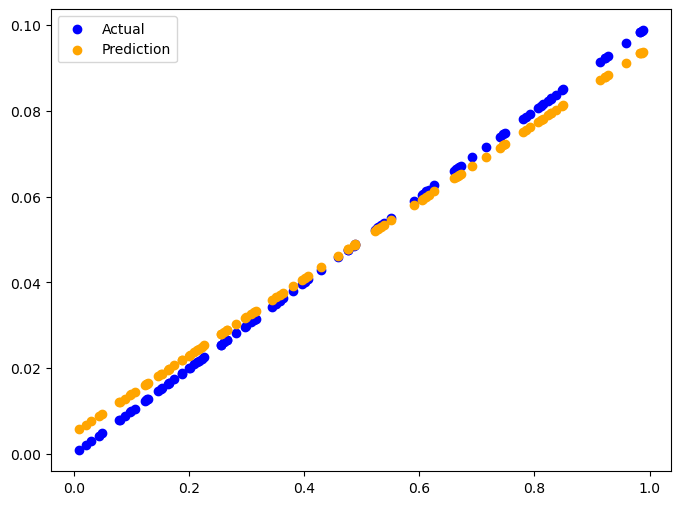

Epoch 20, W : 0.0928, Error : 0.0019


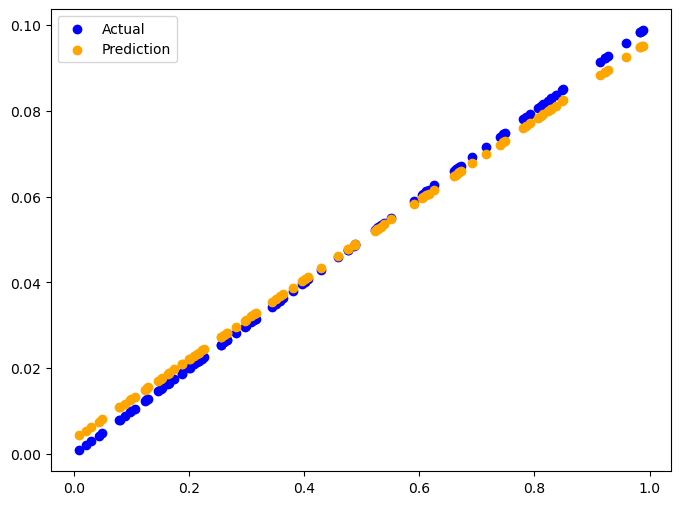

Epoch 30, W : 0.0949, Error : 0.0013


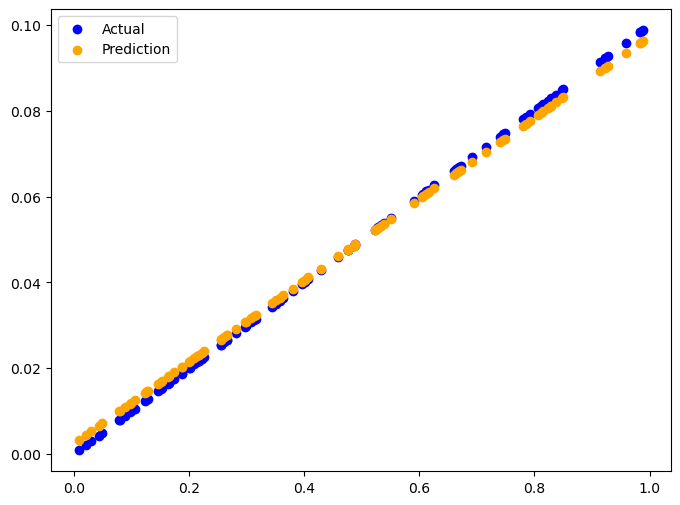

In [6]:
for epoch in range(100):
  y_pred = W * X + b
  error = np.abs(y_pred - y ).mean()
  if error < 0.001 : 
    break
  W_descent = learning_rate * ( (y_pred - y)*X).mean()
  b_descent = learning_rate * ( (y_pred - y).mean())
  W = W - W_descent
  b = b - b_descent
  
  if epoch%10 == 0 : 
    print( f'Epoch {epoch}, W : {W:.4f}, Error : {error:.4f}')
    y_pred = W * X + b
    plt_prediction(y_pred, y)
  

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline